## Fraud detection in transactions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This is a huge dataset with 6362619 entries

In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data['step'].nunique()

743

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in our dataset

In [8]:
(data['isFraud'] == 1).sum()

8213

8213 transactions are fraud (We can see that this data is unbalanced).

<AxesSubplot:ylabel='amount'>

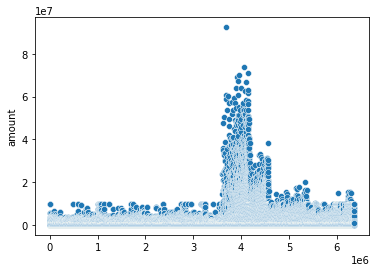

In [9]:
sns.scatterplot(y= data['amount'] ,x = data.index)

<AxesSubplot:xlabel='type', ylabel='count'>

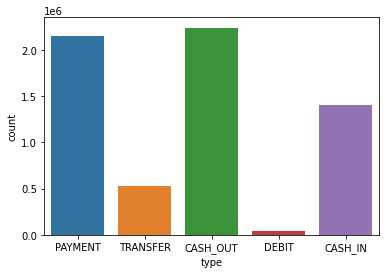

In [12]:
sns.countplot(x = data['type'])

Lets convert string values to numbers

In [9]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes+1

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,757870,170136.0,160296.36,1662095,0.0,0.0,0,0
1,1,4,1864.28,2188999,21249.0,19384.72,1733925,0.0,0.0,0,0
2,1,5,181.00,1002157,181.0,0.00,439686,0.0,0.0,1,0
3,1,2,181.00,5828263,181.0,0.00,391697,21182.0,0.0,1,0
4,1,4,11668.14,3445982,41554.0,29885.86,828920,0.0,0.0,0,0


<AxesSubplot:xlabel='isFraud', ylabel='amount'>

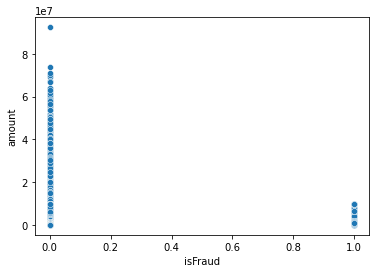

In [11]:
sns.scatterplot(y= data['amount'] ,x = data.isFraud)

<AxesSubplot:>

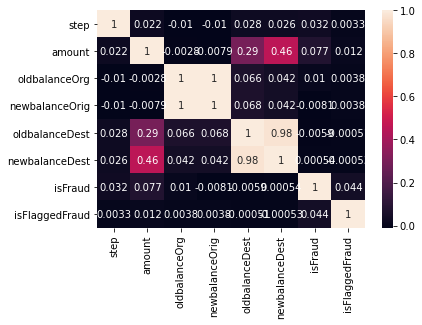

In [13]:
sns.heatmap(data.corr(), annot=True)

## Modeling

In [10]:
X = data.drop(['step','isFraud','isFlaggedFraud'] , axis=1)
y = data['isFraud']

In [11]:
from sklearn.model_selection import train_test_split

Training data = 80%, testing data = 20%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
5438796,2,18695.31,3035272,32671.00,13975.69,163319,0.00,18695.31
4677413,2,49336.77,6106834,106734.00,57397.23,336270,13619737.55,13669074.32
27949,2,54424.12,6191152,0.00,0.00,3194,123031.05,177455.17
2721304,4,84816.40,4308212,0.00,0.00,1610438,0.00,0.00
685816,1,162278.02,1592294,7877592.36,8039870.38,118525,3670281.64,3508003.62


In [16]:
y_train.head()

3134840    0
162371     0
2209905    0
1714928    0
2447815    0
Name: isFraud, dtype: int64

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
predictions = model.predict(X_test)

### Result

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
# Accuracy Score
print(accuracy_score(predictions, y_test))

0.9990813532789952


In [22]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271518
           1       0.45      0.73      0.56      1006

    accuracy                           1.00   1272524
   macro avg       0.73      0.87      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
# Confusion matrix
print(confusion_matrix(predictions, y_test))

[[1270618     900]
 [    269     737]]


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
predictions = model.predict(X_test)

### Result

In [27]:
# Accuracy Score
print(accuracy_score(predictions, y_test))

0.9996785915236176


In [28]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.87      0.88      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [29]:
# Confusion matrix
print(confusion_matrix(predictions, y_test))

[[1270691     213]
 [    196    1424]]


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
predictions = model.predict(X_test)

### Result

In [33]:
# Accuracy Score
print(accuracy_score(predictions, y_test))

0.9996825207225954


In [34]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270919
           1       0.87      0.88      0.88      1605

    accuracy                           1.00   1272524
   macro avg       0.93      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [35]:
# Confusion matrix
print(confusion_matrix(predictions, y_test))

[[1270701     218]
 [    186    1419]]


## Gaussian NB

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [16]:
predictions = model.predict(X_test)

### Result

In [19]:
# Accuracy Score
print(accuracy_score(predictions, y_test))

0.9919592872118719


In [20]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1263356
           1       0.17      0.03      0.05      9168

    accuracy                           0.99   1272524
   macro avg       0.58      0.51      0.52   1272524
weighted avg       0.99      0.99      0.99   1272524



In [21]:
# Confusion matrix
print(confusion_matrix(predictions, y_test))

[[1262014    1342]
 [   8890     278]]


## Final Results

##### Using Logistic Regression => 0.9990
##### Using Desicion Tree       => 0.9996
##### Using Random Forest       => 0.9996
##### Using Gaussian NB         => 0.9919

#### Even though the data is unbalaced, We got 0.999 accuracy.